In [4]:
import csv
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean
from numpy import *
import pylab

In [2]:
df = pd.read_csv("Z:/Papers/NFP-E Delivery and  Sampling/ACS Nano/Figures/Figure 2-BSA delivery in immortalized cells/Figure 2d-Voltage Variation/Intensity_all.csv")
df1 = pd.read_csv("Z:/Papers/NFP-E Delivery and  Sampling/ACS Nano/Figures/Figure 2-BSA delivery in immortalized cells/Figure 2d-Voltage Variation/Avg_BSA_Hela.csv")
df0 = pd.read_csv("Z:/Papers/NFP-E Delivery and  Sampling/ACS Nano/Figures/Figure 2-BSA delivery in immortalized cells/Figure 2d-Voltage Variation/Intensity_Voltage_BSA_Hela.csv")
colors1 = sns.cubehelix_palette(8, start=.5, rot=-.75)
color1 = sns.set_palette(sns.color_palette(colors1))
df
#Intensity_Voltage_BSA_Hela


,Intensity,Voltage,Unnamed: 2,Means_raw,Potential,Means
0,172.0031,10,1720031,2502878.944,10.0,250.287894
1,250.0326,10,2500326,3200791.333,12.0,320.079133
2,244.4319,10,2444319,3768858.000,15.0,376.885800
3,158.8796,10,1588796,4674938.267,18.0,467.493827
4,238.6170,10,2386170,7122975.200,20.0,712.297520
...,...,...,...,...,...,...
79,213.0210,20,2130210,NaN,NaN,NaN
80,561.1948,20,5611948,NaN,NaN,NaN
81,389.9031,20,3899031,NaN,NaN,NaN
82,428.7928,20,4287928,NaN,NaN,NaN


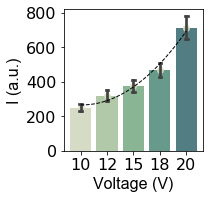

In [12]:
fig, ax = plt.subplots(figsize=(2.5, 2.6))

bar = sns.barplot(y='Intensity', x='Voltage', data=df, estimator=mean, palette=color1, linewidth=1.5, ci=68, ax=ax, capsize=0.1)
for c in bar.patches:
    c.set_zorder(0)

sns.regplot(x=np.arange(0, len(df)), y='Means', data=df, order=2,  line_kws={'linestyle':'--','linewidth': 1, 'color': 'black'}, ci=None, truncate=True, ax=ax)

'''
y1=df.Means
x1=df.Potential
z = np.polyfit(x1[0:4], y1[0:4], 2)
xp = np.linspace(10, 20, 100)
p = np.poly1d(z)
plt.plot(xp, p(xp),'-')
'''
ax.set_xlabel('Voltage (V)', fontsize=16, fontname='Arial')
ax.set_ylabel('I (a.u.)', fontsize=16, fontname='Arial')
#ax.set_xlabel('Voltage(V)',fontsize=14,fontname='Arial')
#ax.set_ylabel('Fluorescence Intensity(a.u.)',fontsize=14,fontname='Arial')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)

fig1=plt.gcf()
fig1.savefig('Q:/Small_response/Voltage_var.svg', format='svg')

In [23]:
V=np.array([0, 10, 12, 15 ,18 ,20])
I=np.array([0, 250.28, 320.07, 376.88, 467.49, 712.29])
yerr=np.array([0, 19.37, 29.50, 38.03, 42.59, 69.80])

In [24]:
q = 2
zq = polyfit(V,I,q) 
pq = poly1d(zq)

(array([-10.,   0.,  10.,  20.,  30.]), <a list of 5 Text xticklabel objects>)

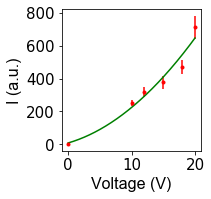

In [25]:
xx = linspace(0, max(V), 500)
fig, ax = plt.subplots(figsize=(2.5, 2.6))
pylab.plot(xx, pq(xx),'-g')
pylab.errorbar(V, I,yerr=yerr, fmt='r.')
ax.set_xlabel('Voltage (V)', fontsize=16, fontname='Arial')
ax.set_ylabel('I (a.u.)', fontsize=16, fontname='Arial')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

#plt.savefig('Z:/Papers/NFP-E Delivery and  Sampling/ACS Nano/Figures/Figure 2-BSA delivery in immortalized cells/Figure 2d-Voltage Variation/Fig2g.svg') 

[  4.56681856 -96.52940959 783.70023665]
[  4.56681856  -5.19303849 275.08799623]


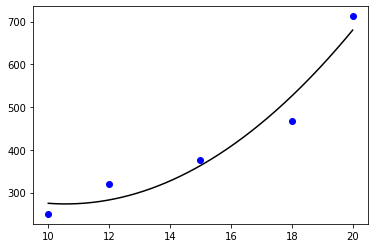

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * (x-10) ** 2 + b*(x-10)+c

V=np.array([10, 12, 15 ,18 ,20])
I=np.array([250.28, 320.07, 376.88, 467.49, 712.29])

print(np.polyfit(V, I, 2))

popt, _ = curve_fit(func, V, I)
print(popt)


xx = linspace(10, max(V), 500)

plt.plot(V, I, 'bo')
plt.plot(xx, func(xx, *popt), 'k-')

plt.show()